In [1]:
from sys import argv
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import subprocess
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import sys

In [3]:
dataset = 'pascal'
query_image = 'pascal/2012_004256.jpg'

# creating feature vector for dataset and storing in csv
subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-f', dataset])

# creating feature vector for query image and storing in csv
subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-i', query_image])

# Read dataset feature vectors
data_features = pd.read_csv('outputFeature.csv', header=None)
# Dropping 1st column from the dataframe
data_feature_vector = data_features.drop(columns=[0])

# Read query image feature vector
query_feature = pd.read_csv('queryFeature.csv', header=None)
# Dropping 1st column from the dataframe
query_feature_vector = query_feature.drop(columns=[0])

In [4]:
# cosine similarity between query image and complete dataset
cos_sim = cosine_similarity(query_feature_vector, data_feature_vector).flatten()
# Create cosine similarity values dataframe
cos_sim_df = pd.DataFrame(cos_sim, columns=['cos_sim'])

In [5]:
# Add cosine similarity as lasy column in data feature dataframe as ground truth
dataset = pd.concat([data_features, cos_sim_df], axis=1)

In [18]:
# sorting result in descending order
sort_result = dataset.sort_values(by='cos_sim', ascending=False)[[0, 'cos_sim']].head(15)
print(sort_result)

                                                    0   cos_sim
34  /Users/prafulla/Desktop/Course PDF/Summer Seme...  1.000000
45  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.951175
43  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.942212
15  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.936690
0   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.936036
5   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.917566
26  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.914308
4   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.910714
13  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.908894
30  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.907307
41  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.905553
18  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.904642
22  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.903614
19  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.902912
47  /Users/prafulla/Desktop/Course PDF/S

QUERY IMAGE..


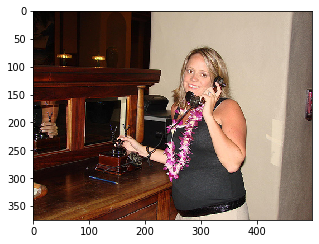

In [19]:
# Query Image
print('QUERY IMAGE..')
query_img = Image.open(query_feature[0][0])
plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap=plt.cm.binary)
plt.show()

TOP 10 SEARCH RESULT


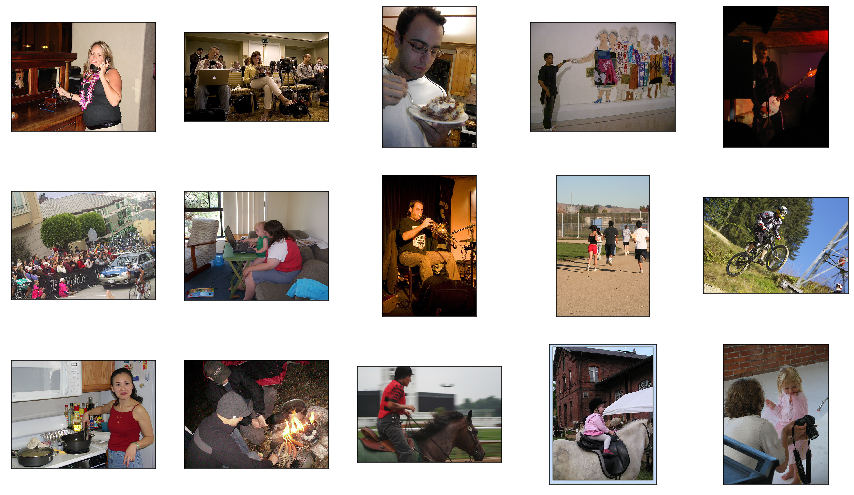

In [20]:
# Display result images
img_array = []
for i in sort_result.index:
    img = Image.open(sort_result[0][i])
    img_array.append(img)
    
# Top 10 Search Results
print('TOP 10 SEARCH RESULT')
plt.figure(figsize=(15,15))
for i in range(len(img_array)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_array[i], cmap=plt.cm.binary)
#     plt.xlabel(img_array[i][1])
plt.show()

In [9]:
# converting result to json format
json_array = []
for i in sort_result.index:
    x = {
        "ObjectId" : "",
        "name": os.path.basename(sort_result[0][i]),
        "score": os.path.basename(str(sort_result['cos_sim'][i])),
        "color": "",
        "fg" : ""
    }
    json_array.append(x)
# convert into JSON:
y = json.dumps(json_array)
print("CONVERTING TO JSON..")
print(y)

CONVERTING TO JSON..
[{"ObjectId": "", "name": "2012_004256.jpg", "score": "1.0", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004244.jpg", "score": "0.9511751391878542", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004291.jpg", "score": "0.9422124977949011", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004306.jpg", "score": "0.9366902713351243", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004274.jpg", "score": "0.936035718262878", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004315.jpg", "score": "0.9175662644332842", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004231.jpg", "score": "0.9143082451021495", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004329.jpg", "score": "0.9107135619195753", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004272.jpg", "score": "0.9088936856399134", "color": "", "fg": ""}, {"ObjectId": "", "name": "2012_004308.jpg", "score": "0.907307222634129", "color": "", "fg": ""}]


# Model after applying PCA

In [10]:
import numpy as np
from sklearn.decomposition import PCA
pca_dims = PCA()
pca_dims.fit(data_feature_vector)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

25

In [11]:
pca = PCA(n_components=d)
data_reduced = pca.fit_transform(data_feature_vector)

In [12]:
query_reduced = pca.transform(query_feature_vector)
query_reduced.shape

(1, 25)

In [13]:
# cosine similarity between query image and complete dataset
cos_sim_reduced = cosine_similarity(query_reduced, data_reduced).flatten()
# Create cosine similarity values dataframe
cos_sim_df_reduced = pd.DataFrame(cos_sim_reduced, columns=['cos_sim'])


In [14]:
# Add cosine similarity as lasy column in data feature dataframe as ground truth
dataset_reduced = pd.concat([data_features, cos_sim_df_reduced], axis=1)


In [15]:
# sorting result in descending order
sort_result_reduced = dataset_reduced.sort_values(by='cos_sim', ascending=False)[[0, 'cos_sim']].head(15)
print(sort_result_reduced)

                                                    0   cos_sim
34  /Users/prafulla/Desktop/Course PDF/Summer Seme...  1.000000
0   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.701541
45  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.631146
4   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.496052
43  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.442139
18  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.432606
33  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.371755
16  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.293166
25  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.280469
15  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.275195
30  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.256467
40  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.247688
13  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.204792
39  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.202458
22  /Users/prafulla/Desktop/Course PDF/S

QUERY IMAGE..


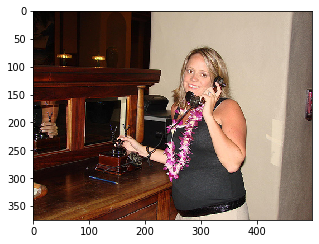

In [16]:
# Query Image
print('QUERY IMAGE..')
query_img = Image.open(query_feature[0][0])
plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap=plt.cm.binary)
plt.show()

TOP 10 SEARCH RESULT


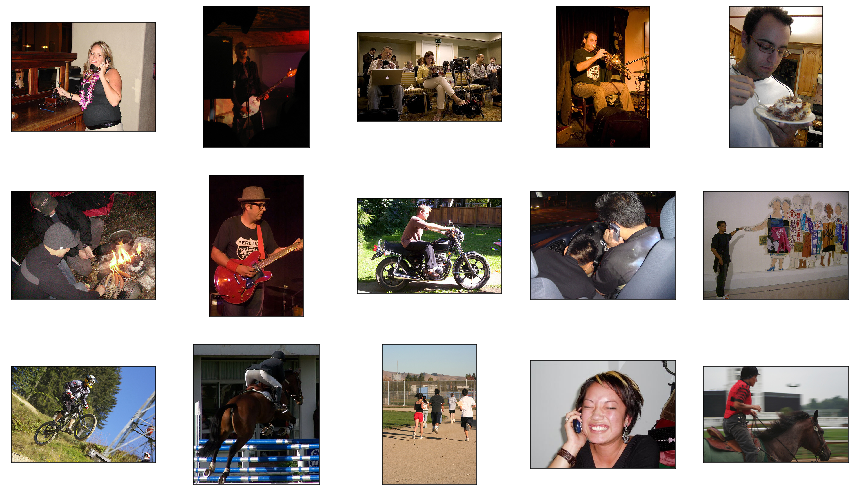

In [17]:
# Display result images
img_array_reduced = []
for i in sort_result_reduced.index:
    img = Image.open(sort_result_reduced[0][i])
    img_array_reduced.append(img)
    
# Top 10 Search Results
print('TOP 10 SEARCH RESULT')
plt.figure(figsize=(15,15))
for i in range(len(img_array_reduced)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_array_reduced[i], cmap=plt.cm.binary)
#     plt.xlabel(img_array[i][1])
plt.show()